In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
"定义卷积"
def corr2d(X, K):
    Y = torch.zeros((X.shape[0] - K.shape[0] + 1, X.shape[1] - K.shape[1] + 1), dtype = torch.float32)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + K.shape[0], j:j + K.shape[1]] * K).sum()
    return Y

In [3]:
x = torch.arange(9, dtype = torch.float32)
k = torch.arange(4, dtype = torch.float32)
x = x.reshape(3, 3)
k = k.reshape(2, 2)
x = x.requires_grad_(True)

In [4]:
y = torch.tensor([[19., 25.],[37., 43.]], dtype = torch.float32)
x, y

(tensor([[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]], requires_grad=True),
 tensor([[19., 25.],
         [37., 43.]]))

### 使用自定义卷积与梯队下降来进行求卷积核

In [5]:
w = torch.randn((2, 2), requires_grad = True)

In [6]:
alpha = 0.01
epochs = 200
loss_hist = []
for i in range(epochs):
    Y_hat = corr2d(x, w)
    l = (Y_hat - y) ** 2
    l.mean().backward()
    with torch.no_grad():
        w[:] = w - alpha * w.grad
        w.grad.zero_()
    loss_hist.append(l.mean().detach().numpy())
    print(f"第{i}轮的平均损失loss为{l.mean()}")

第0轮的平均损失loss为2873.759765625
第1轮的平均损失loss为1237.904296875
第2轮的平均损失loss为534.1871337890625
第3轮的平均损失loss为231.4146270751953
第4轮的平均损失loss为101.10455322265625
第5轮的平均损失loss为44.979522705078125
第6轮的平均损失loss为20.767292022705078
第7轮的平均损失loss为10.285099029541016
第8轮的平均损失loss为5.711824893951416
第9轮的平均损失loss为3.683246612548828
第10轮的平均损失loss为2.7521538734436035
第11轮的平均损失loss为2.2959251403808594
第12轮的平均损失loss为2.0466034412384033
第13轮的平均损失loss为1.8888150453567505
第14轮的平均损失loss为1.7728079557418823
第15轮的平均损失loss为1.6770697832107544
第16轮的平均损失loss为1.592240571975708
第17轮的平均损失loss为1.5141843557357788
第18轮的平均损失loss为1.4410278797149658
第19轮的平均损失loss为1.3718675374984741
第20轮的平均损失loss为1.3062206506729126
第21轮的平均损失loss为1.2438056468963623
第22轮的平均损失loss为1.1844098567962646
第23轮的平均损失loss为1.1278630495071411
第24轮的平均损失loss为1.0740222930908203
第25轮的平均损失loss为1.0227588415145874
第26轮的平均损失loss为0.9739425182342529
第27轮的平均损失loss为0.9274535179138184
第28轮的平均损失loss为0.8831857442855835
第29轮的平均损失loss为0.8410312533378601
第30轮的平均损失loss为0.8008880615234375


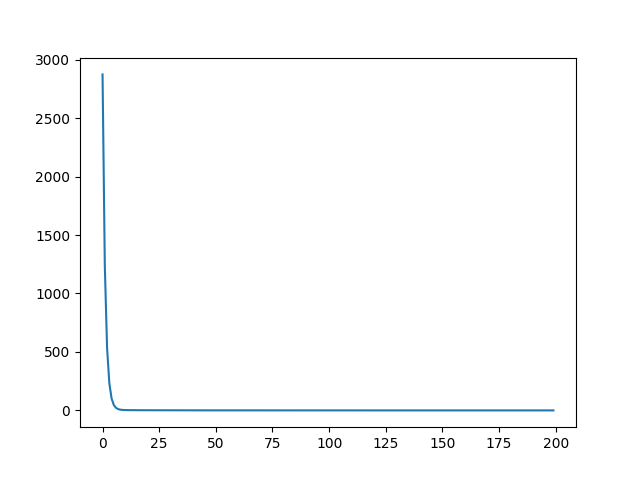

In [7]:
plt.figure(num = 0)
plt.plot(torch.arange(epochs), loss_hist)
plt.show()

In [8]:
w, k, Y_hat, y

(tensor([[0.3454, 0.5076],
         [2.1503, 3.0050]], requires_grad=True),
 tensor([[0., 1.],
         [2., 3.]]),
 tensor([[18.9781, 24.9867],
         [37.0039, 43.0124]], grad_fn=<CopySlices>),
 tensor([[19., 25.],
         [37., 43.]]))